In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
convMb=0.28002*100

def convkeV(x):
    return 25.0*(x**2)

In [4]:
folder="~/newmonti/calculos/"

In [5]:
s = open("/home/ale/newmonti/calculos/O8/O8_CDW.dat").read()
s = s.replace('D+', 'E+')
s = s.replace('D-', 'E-')
f = open("/home/ale/newmonti/calculos/O8/O8_CDW.dat", 'w')
f.write(s)
f.close()

In [6]:
irows=14

In [7]:
P_CDW=[]
He_CDW=[]
Be_CDW=[]
C_CDW=[]
O_CDW=[]
for i in range(5):
    dump=pd.read_csv(folder+"P/P_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    dumhe=pd.read_csv(folder+"He2/He2_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    dumbe=pd.read_csv(folder+"Be4/Be4_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    dumc=pd.read_csv(folder+"C6/C6_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    dumo=pd.read_csv(folder+"O8/O8_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    P_CDW.append(dump)
    He_CDW.append(dumhe)
    Be_CDW.append(dumbe)
    C_CDW.append(dumc)
    O_CDW.append(dumo)

# Some data points are scaled born calculations 

In [8]:
ht=He_CDW[0]
ct=He_CDW[1]
nt=He_CDW[2]
ot=He_CDW[3]
pt=He_CDW[4]
for i in range(9,14):
    ht.at[i,4]=ht[4][i]*2**2
    ct.at[i,4]=ct[4][i]*2**2
    nt.at[i,4]=nt[4][i]*2**2
    ot.at[i,4]=ot[4][i]*2**2
    pt.at[i,4]=pt[4][i]*2**2

In [9]:
ht=Be_CDW[0]
ct=Be_CDW[1]
nt=Be_CDW[2]
ot=Be_CDW[3]
pt=Be_CDW[4]
ht.at[13,4]=ht[4][13]*4**2
ct.at[13,4]=ct[4][13]*4**2
nt.at[13,4]=nt[4][13]*4**2
ot.at[13,4]=ot[4][13]*4**2
pt.at[13,4]=pt[4][13]*4**2

In [10]:
ht=C_CDW[0]
ct=C_CDW[1]
nt=C_CDW[2]
ot=C_CDW[3]
pt=C_CDW[4]
ht.at[13,4]=ht[4][13]*6**2
ct.at[13,4]=ct[4][13]*6**2
nt.at[13,4]=nt[4][13]*6**2
ot.at[13,4]=ot[4][13]*6**2
pt.at[13,4]=pt[4][13]*6**2

In [11]:
ht=O_CDW[0]
ct=O_CDW[1]
nt=O_CDW[2]
ot=O_CDW[3]
pt=O_CDW[4]
ht.at[13,4]=ht[4][13]*8**2
ct.at[13,4]=ct[4][13]*8**2
nt.at[13,4]=nt[4][13]*8**2
ot.at[13,4]=ot[4][13]*8**2
pt.at[13,4]=pt[4][13]*8**2

# Copy data into target_projectile named pandas 

In [12]:
H_P=P_CDW[0]
C_P=P_CDW[1]
N_P=P_CDW[2]
O_P=P_CDW[3]
P_P=P_CDW[4]

In [13]:
H_He=He_CDW[0]
C_He=He_CDW[1]
N_He=He_CDW[2]
O_He=He_CDW[3]
P_He=He_CDW[4]

In [14]:
H_Be=Be_CDW[0]
C_Be=Be_CDW[1]
N_Be=Be_CDW[2]
O_Be=Be_CDW[3]
P_Be=Be_CDW[4]

In [15]:
H_C=C_CDW[0]
C_C=C_CDW[1]
N_C=C_CDW[2]
O_C=C_CDW[3]
P_C=C_CDW[4]

In [16]:
H_O=O_CDW[0]
C_O=O_CDW[1]
N_O=O_CDW[2]
O_O=O_CDW[3]
P_O=O_CDW[4]

# Antiproton data

In [17]:
AP_CDW=[]
for i in range(6):
    dumap=pd.read_csv(folder+"AP/AP_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    AP_CDW.append(dumap)

In [18]:
H_AP=AP_CDW[0]
H_AP[4]=H_AP[4]/4.
C_AP=AP_CDW[1]
N_AP=AP_CDW[2]
O_AP=AP_CDW[3]
P_AP=AP_CDW[4]
S_AP=AP_CDW[5]

# Sulfur data

In [19]:
S_CDW=[]
for i in range(5):
    dumap=pd.read_csv(folder+"sulfur/S_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    S_CDW.append(dumap)

In [20]:
S_P=S_CDW[0]
S_He=S_CDW[1]
S_Be=S_CDW[2]
S_C=S_CDW[3]
S_O=S_CDW[4]

# Implementing Cubic Spline

In [21]:
from scipy import interpolate

def interp_XS(XY,ix,iy,kind):
    x=XY[ix].values
    y=XY[iy].values
    n=len(x)
    spline = interpolate.interp1d(x, y, kind=kind)
    xnew = np.arange(x[0], x[n-1], 0.1)
    ynew = spline(xnew)
    XYnew = pd.DataFrame({ix:xnew, iy:ynew})
    return XYnew

In [22]:
H_Pint=interp_XS(H_P,1,4,'cubic')
C_Pint=interp_XS(C_P,1,4,'cubic')
N_Pint=interp_XS(N_P,1,4,'cubic')
O_Pint=interp_XS(O_P,1,4,'cubic')
P_Pint=interp_XS(P_P,1,4,'cubic')
S_Pint=interp_XS(S_P,1,4,'cubic')

In [23]:
H_APint=interp_XS(H_AP,1,4,'cubic')
C_APint=interp_XS(C_AP,1,4,'cubic')
N_APint=interp_XS(N_AP,1,4,'cubic')
O_APint=interp_XS(O_AP,1,4,'cubic')
P_APint=interp_XS(P_AP,1,4,'cubic')
S_APint=interp_XS(S_AP,1,4,'cubic')

In [24]:
H_Heint=interp_XS(H_He,1,4,'cubic')
C_Heint=interp_XS(C_He,1,4,'cubic')
N_Heint=interp_XS(N_He,1,4,'cubic')
O_Heint=interp_XS(O_He,1,4,'cubic')
P_Heint=interp_XS(P_He,1,4,'cubic')
S_Heint=interp_XS(S_He,1,4,'cubic')

In [25]:
H_Beint=interp_XS(H_Be,1,4,'cubic')
C_Beint=interp_XS(C_Be,1,4,'cubic')
N_Beint=interp_XS(N_Be,1,4,'cubic')
O_Beint=interp_XS(O_Be,1,4,'cubic')
P_Beint=interp_XS(P_Be,1,4,'cubic')
S_Beint=interp_XS(S_Be,1,4,'cubic')

In [26]:
H_Cint=interp_XS(H_C,1,4,'cubic')
C_Cint=interp_XS(C_C,1,4,'cubic')
N_Cint=interp_XS(N_C,1,4,'cubic')
O_Cint=interp_XS(O_C,1,4,'cubic')
P_Cint=interp_XS(P_C,1,4,'cubic')
S_Cint=interp_XS(S_C,1,4,'cubic')

In [27]:
H_Oint=interp_XS(H_O,1,4,'cubic')
C_Oint=interp_XS(C_O,1,4,'cubic')
N_Oint=interp_XS(N_O,1,4,'cubic')
O_Oint=interp_XS(O_O,1,4,'cubic')
P_Oint=interp_XS(P_O,1,4,'cubic')
S_Oint=interp_XS(S_O,1,4,'cubic')

In [28]:
co_p='tab:red'
co_ap='tab:red'
co_he='tab:green'
co_be='tab:blue'
co_c='tab:purple'
co_o='tab:orange'

In [29]:
#co_p='red'
#co_ap='red'
#co_he='darkorchid'
#co_be='royalblue'
#co_c='forestgreen'
#co_o='darkorange'

In [30]:
dum=H_Pint[convkeV(H_Pint[1]) < 100.]
ie100=len(dum)

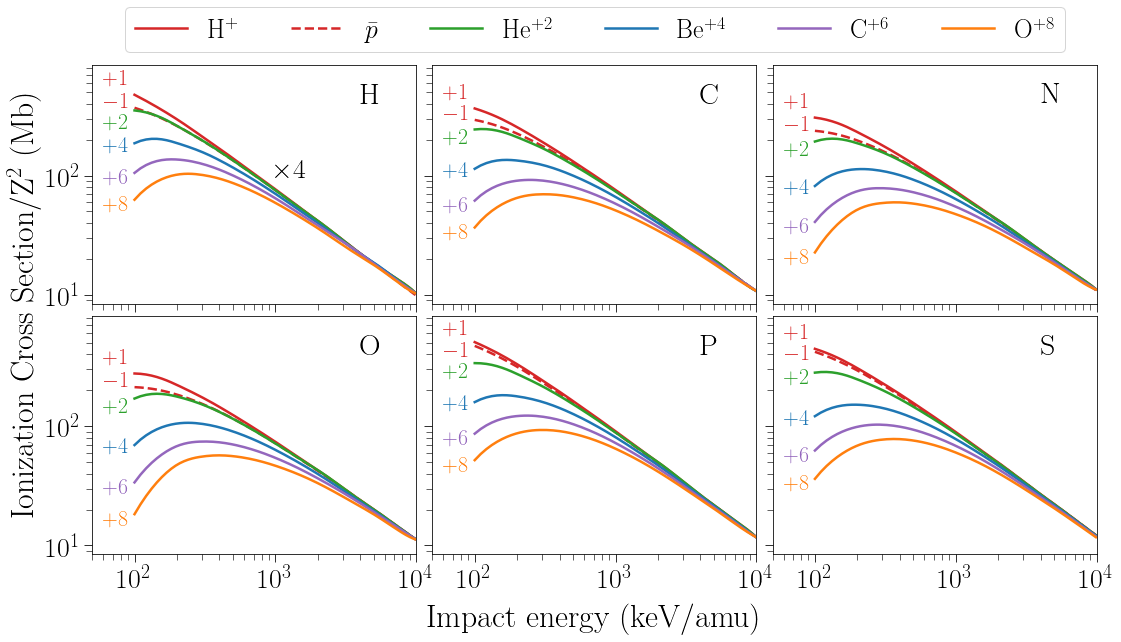

In [37]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

iwidth=2.5
xmin=50.
xmax=convkeV(20)
ymin=0.3*convMb
ymax=30*convMb
xtext=4000
ytext=400
iminus=0

fig = plt.figure(figsize=(18,9))
ax1 = plt.subplot(231)
plt.plot(convkeV(H_Pint[1][ie100:]), 4*H_Pint[4][ie100:]*convMb,co_p,linewidth=iwidth,label=r'H$^{+}$')
plt.plot(convkeV(H_APint[1][ie100:]),4*H_APint[4][ie100:]*convMb,co_p,linestyle='--',linewidth=iwidth,label=r'$\bar{p}$')
plt.plot(convkeV(H_Heint[1][ie100:]),4*H_Heint[4][ie100:]*convMb/2**2,co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convkeV(H_Beint[1][ie100:]),4*H_Beint[4][ie100:]*convMb/4**2,co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convkeV(H_Cint[1][ie100:]), 4*H_Cint[4][ie100:]*convMb/6**2,co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convkeV(H_Oint[1][ie100:]), 4*H_Oint[4][ie100:]*convMb/8**2,co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
ax1.tick_params(which='major', labelsize=28,length=8);
ax1.tick_params(which='minor', length=6)
plt.ylabel("Ionization Cross Section/Z$^2$ (Mb)", fontsize=32,labelpad=5,position=(1,0))
ax1.legend(loc='upper left',bbox_to_anchor=(0.06, 1.3, 0, 0),fontsize=26,ncol=6)
plt.text(xtext, ytext, 'H',fontsize=30)
plt.text(1000,100, r'$\times$4',fontsize=28)
plt.text(60, 4*H_Pint[4][ie100]*convMb*1.2, r'$+1$',color=co_p,fontsize=22)
plt.text(60, 4*H_APint[4][ie100]*convMb*1.05, r'$-1$',color=co_p,fontsize=22)
plt.text(60, 4*H_Heint[4][ie100]*convMb*0.7/2**2, r'$+2$',color=co_he,fontsize=22)
plt.text(60, 4*H_Beint[4][ie100]*convMb*0.85/4**2, r'$+4$',color=co_be,fontsize=22)
plt.text(60, 4*H_Cint[4][ie100]*convMb*0.8/6**2, r'$+6$',color=co_c,fontsize=22)
plt.text(60, 4*H_Oint[4][ie100]*convMb*0.8/8**2, r'$+8$',color=co_o,fontsize=22)

ax2 = plt.subplot(232)
plt.plot(convkeV(C_Pint[1][ie100:]), C_Pint[4][ie100:]*convMb,co_p,linewidth=iwidth,label=r'H$^{+}$')
plt.plot(convkeV(C_APint[1][ie100:]),C_APint[4][ie100:]*convMb,co_p,linestyle='--',linewidth=iwidth,label=r'$\bar{p}$')
plt.plot(convkeV(C_Heint[1][ie100:]),C_Heint[4][ie100:]*convMb/2**2,co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convkeV(C_Beint[1][ie100:]),C_Beint[4][ie100:]*convMb/4**2,co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convkeV(C_Cint[1][ie100:]), C_Cint[4][ie100:]*convMb/6**2,co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convkeV(C_Oint[1][ie100:]), C_Oint[4][ie100:]*convMb/8**2,co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
ax2.tick_params(which='major', labelsize=28,length=8);
ax2.tick_params(which='minor', length=6)
plt.text(xtext, ytext, 'C',fontsize=30)
plt.text(60, C_Pint[4][ie100]*convMb*1.2, r'$+1$',color=co_p,fontsize=22)
plt.text(60, C_APint[4][ie100]*convMb*1.05, r'$-1$',color=co_p,fontsize=22)
plt.text(60, C_Heint[4][ie100]*convMb*0.75/2**2, r'$+2$',color=co_he,fontsize=22)
plt.text(60, C_Beint[4][ie100]*convMb*0.85/4**2, r'$+4$',color=co_be,fontsize=22)
plt.text(60, C_Cint[4][ie100]*convMb*0.8/6**2, r'$+6$',color=co_c,fontsize=22)
plt.text(60, C_Oint[4][ie100]*convMb*0.8/8**2, r'$+8$',color=co_o,fontsize=22)

ax3 = plt.subplot(233)
plt.plot(convkeV(N_Pint[1][ie100:]), N_Pint[4][ie100:]*convMb,co_p,linewidth=iwidth,label=r'H$^{+}$')
plt.plot(convkeV(N_APint[1][ie100:]),N_APint[4][ie100:]*convMb,co_p,linestyle='--',linewidth=iwidth,label=r'$\bar{p}$')
plt.plot(convkeV(N_Heint[1][ie100:]),N_Heint[4][ie100:]*convMb/2**2,co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convkeV(N_Beint[1][ie100:]),N_Beint[4][ie100:]*convMb/4**2,co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convkeV(N_Cint[1][ie100:]), N_Cint[4][ie100:]*convMb/6**2,co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convkeV(N_Oint[1][ie100:]), N_Oint[4][ie100:]*convMb/8**2,co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
ax3.tick_params(which='major', labelsize=28,length=8);
ax3.tick_params(which='minor', length=6)
plt.text(xtext, ytext, 'N',fontsize=30)
plt.text(60, N_Pint[4][ie100]*convMb*1.2, r'$+1$',color=co_p,fontsize=22)
plt.text(60, N_APint[4][ie100]*convMb*1.05, r'$-1$',color=co_p,fontsize=22)
plt.text(60, N_Heint[4][ie100]*convMb*0.75/2**2, r'$+2$',color=co_he,fontsize=22)
plt.text(60, N_Beint[4][ie100]*convMb*0.85/4**2, r'$+4$',color=co_be,fontsize=22)
plt.text(60, N_Cint[4][ie100]*convMb*0.8/6**2, r'$+6$',color=co_c,fontsize=22)
plt.text(60, N_Oint[4][ie100]*convMb*0.8/8**2, r'$+8$',color=co_o,fontsize=22)

### Oxigeno ###
ax4 = plt.subplot(234)
plt.plot(convkeV(O_Pint[1][ie100:]), O_Pint[4][ie100:]*convMb,co_p,linewidth=iwidth,label=r'H$^{+}$')
plt.plot(convkeV(O_APint[1][ie100:]),O_APint[4][ie100:]*convMb,co_p,linestyle='--',linewidth=iwidth,label=r'$\bar{p}$')
plt.plot(convkeV(O_Heint[1][ie100:]),O_Heint[4][ie100:]*convMb/2**2,co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convkeV(O_Beint[1][ie100:]),O_Beint[4][ie100:]*convMb/4**2,co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convkeV(O_Cint[1][ie100:]), O_Cint[4][ie100:]*convMb/6**2,co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convkeV(O_Oint[1][ie100:]), O_Oint[4][ie100:]*convMb/8**2,co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
ax4.tick_params(which='major', labelsize=28,length=8);
ax4.tick_params(which='minor', length=6)
plt.text(xtext, ytext, 'O',fontsize=30)
plt.text(60, O_Pint[4][ie100]*convMb*1.2, r'$+1$',color=co_p,fontsize=22)
plt.text(60, O_APint[4][ie100]*convMb*1.05, r'$-1$',color=co_p,fontsize=22)
plt.text(60, O_Heint[4][ie100]*convMb*0.75/2**2, r'$+2$',color=co_he,fontsize=22)
plt.text(60, O_Beint[4][ie100]*convMb*0.85/4**2, r'$+4$',color=co_be,fontsize=22)
plt.text(60, O_Cint[4][ie100]*convMb*0.8/6**2, r'$+6$',color=co_c,fontsize=22)
plt.text(60, O_Oint[4][ie100]*convMb*0.8/8**2, r'$+8$',color=co_o,fontsize=22)

### Sulfuro ###
ax5 = plt.subplot(235)
plt.plot(convkeV(P_Pint[1][ie100:]), P_Pint[4][ie100:]*convMb,co_p,linewidth=iwidth,label=r'H$^{+}$')
plt.plot(convkeV(P_APint[1][ie100:]),P_APint[4][ie100:]*convMb,co_p,linestyle='--',linewidth=iwidth,label=r'$\bar{p}$')
plt.plot(convkeV(P_Heint[1][ie100:]),P_Heint[4][ie100:]*convMb/2**2,co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convkeV(P_Beint[1][ie100:]),P_Beint[4][ie100:]*convMb/4**2,co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convkeV(P_Cint[1][ie100:]), P_Cint[4][ie100:]*convMb/6**2,co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convkeV(P_Oint[1][ie100:]), P_Oint[4][ie100:]*convMb/8**2,co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
ax5.tick_params(which='major', labelsize=28,length=8);
ax5.tick_params(which='minor', length=6)
plt.xlabel("Impact energy (keV/amu)", fontsize=32,labelpad=10)
plt.text(xtext, ytext, 'P',fontsize=30)
plt.text(60, P_Pint[4][ie100]*convMb*1.15, r'$+1$',color=co_p,fontsize=22)
plt.text(60, P_APint[4][ie100]*convMb*0.85, r'$-1$',color=co_p,fontsize=22)
plt.text(60, P_Heint[4][ie100]*convMb*0.75/2**2, r'$+2$',color=co_he,fontsize=22)
plt.text(60, P_Beint[4][ie100]*convMb*0.85/4**2, r'$+4$',color=co_be,fontsize=22)
plt.text(60, P_Cint[4][ie100]*convMb*0.8/6**2, r'$+6$',color=co_c,fontsize=22)
plt.text(60, P_Oint[4][ie100]*convMb*0.8/8**2, r'$+8$',color=co_o,fontsize=22)

ax6 = plt.subplot(236)
plt.plot(convkeV(S_Pint[1][ie100:]), S_Pint[4][ie100:]*convMb,co_p,linewidth=iwidth,label=r'H$^{+}$')
plt.plot(convkeV(S_APint[1][ie100:]),S_APint[4][ie100:]*convMb,co_p,linestyle='--',linewidth=iwidth,label=r'$\bar{p}$')
plt.plot(convkeV(S_Heint[1][ie100:]),S_Heint[4][ie100:]*convMb,co_he,linewidth=iwidth,label=r'He$^{+2}$')
plt.plot(convkeV(S_Beint[1][ie100:]),S_Beint[4][ie100:]*convMb,co_be,linewidth=iwidth,label=r'Be$^{+4}$')
plt.plot(convkeV(S_Cint[1][ie100:]), S_Cint[4][ie100:]*convMb,co_c,linewidth=iwidth,label=r'C$^{+6}$')
plt.plot(convkeV(S_Oint[1][ie100:]), S_Oint[4][ie100:]*convMb,co_o,linewidth=iwidth,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
ax6.tick_params(which='major', labelsize=28,length=8);
ax6.tick_params(which='minor', length=6)
plt.text(xtext, ytext, 'S',fontsize=30)
plt.text(60, S_Pint[4][ie100]*convMb*1.2, r'$+1$',color=co_p,fontsize=22)
plt.text(60, S_APint[4][ie100]*convMb*0.9, r'$-1$',color=co_p,fontsize=22)
plt.text(60, S_Heint[4][ie100]*convMb*0.8, r'$+2$',color=co_he,fontsize=22)
plt.text(60, S_Beint[4][ie100]*convMb*0.85, r'$+4$',color=co_be,fontsize=22)
plt.text(60, S_Cint[4][ie100]*convMb*0.8, r'$+6$',color=co_c,fontsize=22)
plt.text(60, S_Oint[4][ie100]*convMb*0.8, r'$+8$',color=co_o,fontsize=22)

for ax in fig.get_axes():
    ax.label_outer()
fig.subplots_adjust(hspace=0.05, wspace=0.05)

plt.savefig("../atomicscaling.eps",bbox_inches='tight')
plt.show()